In [ ]:
%matplotlib ipympl
import tprstats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
coffee_data = pd.read_excel('../data/Coffee_Data.xlsx', engine='openpyxl')
plot_3d_example = pd.read_excel('../data/Plot_3D_Example.xlsx')

In [3]:
model_coffee_ts = tprstats.model(name = "ts", formula='cons~rpcarb+rpcinc+rpcofe', data=coffee_data)
model_log_coffee_ts = tprstats.model(name = "ts", formula='log(cons) ~ log(rpcarb) + log(rpcinc) + log(rpcofe)', data=coffee_data)

In [13]:
def plot_3D(x_label, y_label, z_label, phi, theta, data):
    x = data[x_label]
    y = data[y_label]
    z = data[z_label]
   
    # Fit a linear regression model
    X = sm.add_constant(pd.DataFrame({x_label: x, y_label: y}))
    fit = sm.OLS(z, X).fit()
    z_pred = fit.predict(X)
    
    # Create a grid for predictions
    grid_lines = 26
    grid_x_pred = np.linspace(x.min(), x.max(), grid_lines)
    grid_y_pred = np.linspace(y.min(), y.max(), grid_lines)
    grid_x_pred, grid_y_pred = np.meshgrid(grid_x_pred, grid_y_pred)
    grid_xy_pred = pd.DataFrame({x_label: grid_x_pred.ravel(), y_label: grid_y_pred.ravel()})
    grid_z_pred = fit.predict(sm.add_constant(grid_xy_pred)).values.reshape(grid_lines, grid_lines)
    
    # Create the 3D scatter plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the actual data points
    ax.scatter(x, y, z, color='black', label='Actual',s=10)
    # Plot the predicted data points
    ax.scatter(x, y, z_pred, color='red', label='Predicted',s=10)
    
    # Plot the regression surface
    ax.plot_surface(grid_x_pred, grid_y_pred, grid_z_pred, color='blue', alpha=0.5)
    
    # Add vertical lines from the horizontal plane to the data points
    for i in range(len(x)):
        ax.plot([x[i], x[i]], [y[i], y[i]], [z_pred[i], z[i]], color='red', linestyle='--',linewidth=.85)

    # Set labels and title
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    ax.set_title(f'{z_label} as a function of {x_label} and {y_label}')
    
    # Set the viewing angle
    ax.view_init(elev=phi, azim=theta)
    
    plt.legend()
    plt.show()

# Example usage:
# Assuming 'data' is a pandas DataFrame with columns 'varx', 'vary', and 'varz'
# plot_3d_regression('varx', 'vary', 'varz', 30, 45, data)

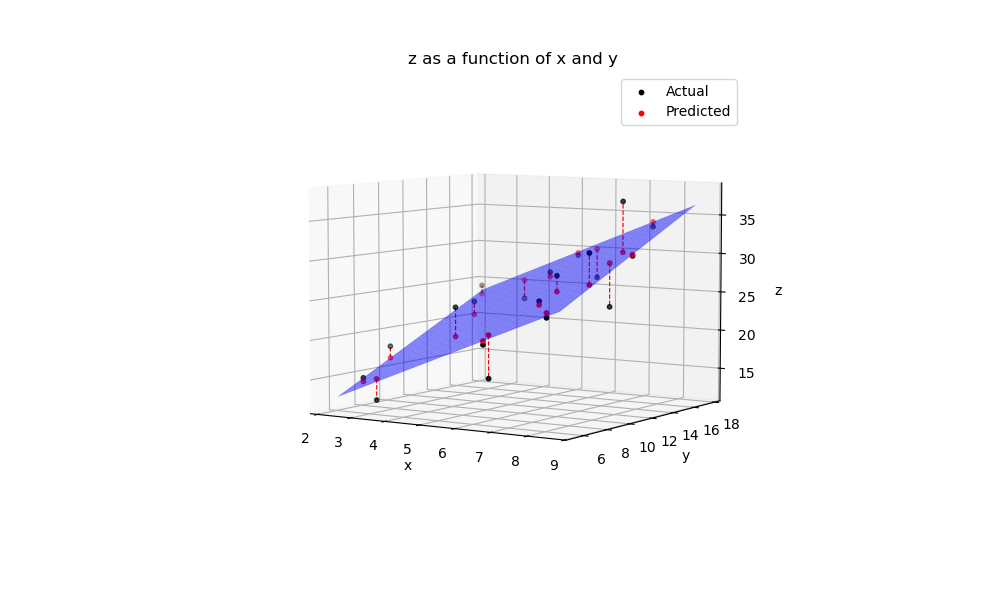

In [ ]:
plot_3D('x', 'y', 'z', 6, -61, plot_3d_example)